In [1]:
import requests

url = 'https://data.cityofchicago.org/resource/pk66-w54g.json?$limit=125000'

r = requests.get(url)
print(f"Status code: {r.status_code}")

response_dict = r.json()



Status code: 200


In [2]:
import pandas as pd
data = pd.DataFrame(response_dict)

In [3]:
data.head()

,requestor_,organization,park_number,park_facility_name,reservation_start_date,reservation_end_date,event_type,event_description,permit_status
0,Sara Hruska,--,228,Horner Picnic Grove 8,2024-12-31T00:00:00.000,2024-12-31T00:00:00.000,Permit - Athletic T Cluster 3,Spark Montessori Outdoor Program (Non-exclusiv...,Approved
1,Permit Holder Account,--,100,Lincoln Diamond Lawrence 5,2024-12-31T00:00:00.000,2024-12-31T00:00:00.000,Administrative Reservation - Internal Hold REV...,ADMIN HOLD PSG-2024-Summer-Softball-Lincoln-La...,Tentative
2,Permit Holder Account,--,100,Lincoln Diamond Lawrence 2,2024-12-31T00:00:00.000,2024-12-31T00:00:00.000,Administrative Reservation - Internal Hold REV...,ADMIN HOLD PSG-2024-Summer-Softball-Lincoln-La...,Tentative
3,Mike Huberty,--,100,Lincoln Promenade near Grant Statue,2024-12-31T00:00:00.000,2024-12-31T00:00:00.000,Permit - Athletic T Cluster 3,Lincoln Park Hauntings Ghost Tour and Ghost Hu...,Approved
4,Permit Holder Account,--,100,Lincoln Diamond Lawrence 1,2024-12-31T00:00:00.000,2024-12-31T00:00:00.000,Administrative Reservation - Internal Hold REV...,ADMIN HOLD PSG-2024-Summer-Softball-Lincoln-La...,Tentative


In [4]:
# Creating a copy of original Data Frame for EDA
data_copy = data.copy()
data_copy.head()


,requestor_,organization,park_number,park_facility_name,reservation_start_date,reservation_end_date,event_type,event_description,permit_status
0,Sara Hruska,--,228,Horner Picnic Grove 8,2024-12-31T00:00:00.000,2024-12-31T00:00:00.000,Permit - Athletic T Cluster 3,Spark Montessori Outdoor Program (Non-exclusiv...,Approved
1,Permit Holder Account,--,100,Lincoln Diamond Lawrence 5,2024-12-31T00:00:00.000,2024-12-31T00:00:00.000,Administrative Reservation - Internal Hold REV...,ADMIN HOLD PSG-2024-Summer-Softball-Lincoln-La...,Tentative
2,Permit Holder Account,--,100,Lincoln Diamond Lawrence 2,2024-12-31T00:00:00.000,2024-12-31T00:00:00.000,Administrative Reservation - Internal Hold REV...,ADMIN HOLD PSG-2024-Summer-Softball-Lincoln-La...,Tentative
3,Mike Huberty,--,100,Lincoln Promenade near Grant Statue,2024-12-31T00:00:00.000,2024-12-31T00:00:00.000,Permit - Athletic T Cluster 3,Lincoln Park Hauntings Ghost Tour and Ghost Hu...,Approved
4,Permit Holder Account,--,100,Lincoln Diamond Lawrence 1,2024-12-31T00:00:00.000,2024-12-31T00:00:00.000,Administrative Reservation - Internal Hold REV...,ADMIN HOLD PSG-2024-Summer-Softball-Lincoln-La...,Tentative


In [5]:
data_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122950 entries, 0 to 122949
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   requestor_              122950 non-null  object
 1   organization            122950 non-null  object
 2   park_number             122900 non-null  object
 3   park_facility_name      122950 non-null  object
 4   reservation_start_date  122950 non-null  object
 5   reservation_end_date    122950 non-null  object
 6   event_type              122950 non-null  object
 7   event_description       122950 non-null  object
 8   permit_status           122950 non-null  object
dtypes: object(9)
memory usage: 8.4+ MB


In [6]:
## Converting 'Reservation Start Date' and 'Reservation End Date' to datetime
data_copy['reservation_start_date'] = pd.to_datetime(data_copy['reservation_start_date'])
data_copy['reservation_end_date'] = pd.to_datetime(data_copy['reservation_end_date'])
data_copy['reservation_start_date']
data_copy['reservation_end_date']

0        2024-12-31
1        2024-12-31
2        2024-12-31
3        2024-12-31
4        2024-12-31
            ...    
122945   2012-01-14
122946   2012-01-08
122947   2012-01-07
122948   2012-01-07
122949   2012-01-07
Name: reservation_end_date, Length: 122950, dtype: datetime64[ns]

In [7]:
## Handling missing values
### For 'Park Number', filling missing values with a placeholder '-1', #instead of dropping the values, this way could help me in filtering it out.
data_copy['park_number'] = data_copy['park_number'].fillna(-1)
print(data_copy['park_number'] == -1)

0         False
1         False
2         False
3         False
4         False
          ...  
122945    False
122946    False
122947    False
122948    False
122949    False
Name: park_number, Length: 122950, dtype: bool


In [8]:
## Summary Statistics
print(data_copy.describe(include='all', datetime_is_numeric=True))

                   requestor_ organization park_number  \
count                  122950       122950      122950   
unique                  16357          630         392   
top     Permit Holder Account           --         100   
freq                     8288       117447       31278   
mean                      NaN          NaN         NaN   
min                       NaN          NaN         NaN   
25%                       NaN          NaN         NaN   
50%                       NaN          NaN         NaN   
75%                       NaN          NaN         NaN   
max                       NaN          NaN         NaN   

                          park_facility_name         reservation_start_date  \
count                                 122950                         122950   
unique                                  2428                            NaN   
top     Garfield Conservatory All Show Rooms                            NaN   
freq                                    3872 

In [9]:
## Date Range Analysis
### Events per year
data_copy['Year'] = data_copy['reservation_start_date'].dt.year
events_per_year = data_copy['Year'].value_counts().sort_index()


In [10]:
data_copy['event_type'] = data_copy['event_type'].replace({'Permit - Event 6/10,000+':'Event 6'})
data_copy['event_type'] = data_copy['event_type'].replace({'Permit - Festival/Performance/12,001+ Event':'Festival/Performance Event'})

In [11]:
data_copy['event_type'] = data_copy['event_type'].replace({'Permit - Parking Lot Rental':'Parking Lot Rental Permit'})
data_copy['event_type'] = data_copy['event_type'].replace({'Permit - Promotions':'Promotional Event'})

In [12]:
mappings = {
    'Administrative Reservation':'Administrative Reservation',
    'Commemorative':'Commemorative',
    'Athletic':'Athletic',
    'Corporate Event':'Corporate Event',
    'Media':'Media',
    'Picnic':'Picnic',
    'Venue Rental':'Venue Rental',
    'Event 1 Cluster':'Event 1',
    'Event 2 Cluster':'Event 2',
    'Event 3 Cluster':'Event 3',
    'Event 4 Cluster':'Event 4',
    'Event 5 Cluster':'Event 5'
}

def categorize_event(event_description):
    for key,values in mappings.items():
        if key in event_description:
            return values
    return event_description
    
data_copy['Event Type Category'] = data_copy['event_type'].apply(categorize_event)
print(data_copy['Event Type Category'].unique())

['Athletic' 'Administrative Reservation' 'Venue Rental' 'Event 3'
 'Event 2' 'Event 4' 'Event 5' 'Event 1' 'Event 6' 'Commemorative' 'Media'
 'Festival/Performance Event' 'Promotional Event' 'Picnic'
 'Corporate Event' 'Parking Lot Rental Permit']


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-4w7_1ysd because the default path (/tmp/cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


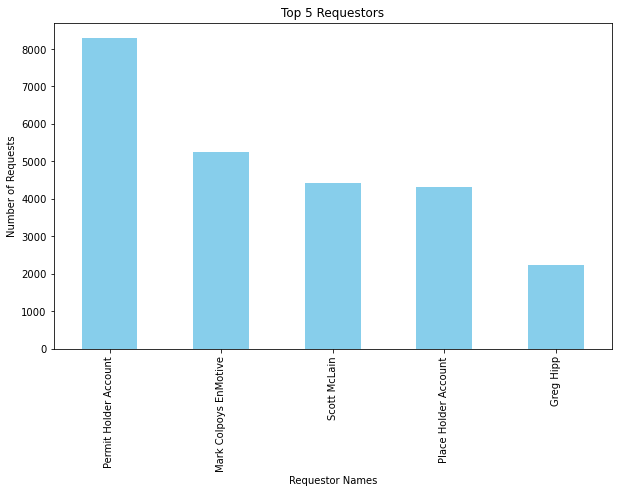

In [13]:
#Displaying a bar chart with the top 5 requestors based on the number of requests they have made
import matplotlib.pyplot as plt

requestor_counts = data_copy['requestor_'].value_counts().nlargest(5)

plt.figure(figsize=(10,6))
requestor_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Requestor Names')
plt.ylabel('Number of Requests')
plt.title('Top 5 Requestors')

plt.show()

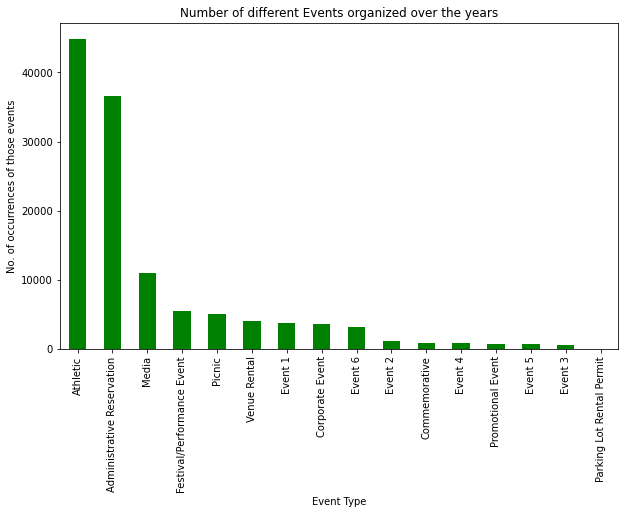

In [14]:
#Displaying a bar chart showing the number of events conducted over the years
event_counts = data_copy['Event Type Category'].value_counts()

plt.figure(figsize=(10,6))
event_counts.plot(kind='bar', color='green')

plt.xlabel('Event Type')
plt.ylabel('No. of occurrences of those events')
plt.title('Number of different Events organized over the years')

plt.show()

In [15]:
#Renaming the columns to avoid duplications
mappings = {
    'Approved':'Approved',
    'Completed':'Approved',
    'Issued':'Approved'
}
def status_change(permit_status):
    for key,values in mappings.items():
        if key in permit_status:
            return values
    return permit_status
    
data_copy['permit_status'] = data_copy['permit_status'].apply(status_change)
print(data_copy['permit_status'].unique())

['Approved' 'Tentative' 'On Hold' 'Waiting Decision' 'Stage Denied']


<ipython-input-16-df2d1f998d43>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  approved_events['Year'] = pd.to_datetime(approved_events['reservation_start_date']).dt.year


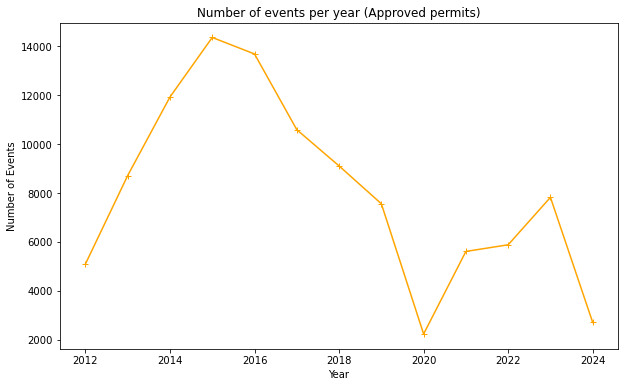

In [16]:
#Trend Analysis
#Line chart shows the trend of the number of events that happened each year, considering only the events with an 'Approved' permit status.

approved_events = data_copy[data_copy['permit_status'] == 'Approved']
approved_events['Year'] = pd.to_datetime(approved_events['reservation_start_date']).dt.year
events_per_year = approved_events.groupby('Year')['Event Type Category']. count()

plt.figure(figsize=(10,6))
events_per_year.plot(kind='line', marker='+', color='orange')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.title('Number of events per year (Approved permits)')

plt.show()